グループメンバー
- 鎌田夏輝
- 谷瑞幾
- 内藤千尋
- 中田亮佑
- 前井涼花
- 村田賢
- 宮村京佑

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
import numpy as np
from PIL import Image

def imgfile2bin(filename):
    threshold = 100
    img = np.array(Image.open(filename).convert('L').resize((200, 200)))
    img_bool = img > threshold
    c_img = np.array([])
    for i in range(img_bool.shape[0]):
        for j in range(img_bool.shape[1]):
            if img_bool[i,j]==False:
                c_img=np.append(c_img,complex(j,(img_bool.shape[0]-1)-i))
    return c_img

In [ ]:
import cmath
import math

def com2polar(arr):
    p_arr = np.array([])
    for value in arr:
        p_arr=np.append(p_arr, np.array([cmath.polar(value)[0], math.degrees(cmath.polar(value)[1])]))
    p_arr = p_arr.reshape([arr.shape[0], 2])
    return p_arr
    

def polar2com(arr):
    c_arr = np.array([])
    for value in arr:
        c_arr=np.append(c_arr,[cmath.rect(value[0],math.radians(value[1]))])
    return c_arr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
from PIL import Image

def imgfile2xy(filename):
  threshold=100
  img = np.array(Image.open(filename).convert('L').resize((200, 200)))
  img_bool = img > threshold
  x = np.array([])
  y = np.array([])
  for i in range(img_bool.shape[0]):
    for j in range(img_bool.shape[1]):
      if img_bool[i,j]==False:
        x=np.append(x, j)
        y=np.append(y, (img_bool.shape[0]-1)-i)
  
  return np.concatenate([[x], [y]])

In [ ]:
# 画像を読みこむ
#img = imgfile2bin('/content/drive/My Drive/G6 (2年前期)/データと数理I/flower.jpg') 
#img
img = imgfile2xy('/content/drive/My Drive/G6 (2年前期)/データと数理I/flower.jpg') 
img

array([[120., 121., 122., ...,  23.,  24.,  25.],
       [158., 158., 158., ...,   0.,   0.,   0.]])

課題１：花びらを表示する
252,150,188

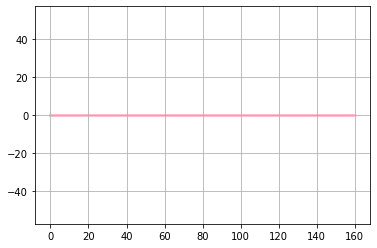

In [ ]:
#花びらの表示
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(img.real,img.imag, s=1, color="pink")
plt.axis('equal') # 実軸、虚軸を等間隔に
plt.grid(which='major')
plt.show()

アフィン変換で72度回転させる

In [ ]:
import math

A=np.array([
            [math.cos(math.radians(72)), -math.sin(math.radians(72)), 0],
            [math.sin(math.radians(72)), math.cos(math.radians(72)), 0],
            [0, 0, 1]
])
# データ行列の3行目に1が成分の行を追加する
img1=np.insert(img, 2, 1, axis=0)

imgnew=np.dot(A,img1)

# 変換後のデータ行列の3行目を消去
imgnew=np.delete(imgnew, 2, axis=0)
imgnew

array([[-113.18489025, -112.87587326, -112.56685626, ...,    7.10739087,
           7.41640786,    7.72542486],
       [ 162.95146707,  163.90252358,  164.8535801 , ...,   21.87429987,
          22.82535639,   23.77641291]])

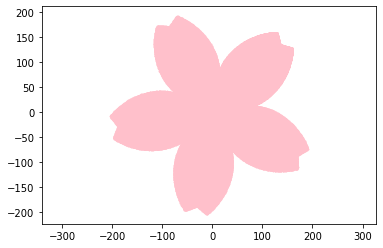

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import math
for i in range(1,5):

  A=np.array([
            [math.cos(math.radians(72*i)), -math.sin(math.radians(72*i)), 0],
            [math.sin(math.radians(72*i)), math.cos(math.radians(72*i)), 0],
            [0, 0, 1]
])
  # データ行列の3行目に1が成分の行を追加する
  img1=np.insert(img, 2, 1, axis=0)

  imgnew=np.dot(A,img1)

  # 変換後のデータ行列の3行目を消去
  imgnew=np.delete(imgnew, 2, axis=0)
  imgnew
  # 元画像を灰色
  plt.scatter(img[0],img[1], s=1, color="pink")
  # 移動後の画像を黒色
  plt.scatter(imgnew[0], imgnew[1], s=1, color="pink")
  plt.axis('equal')
  plt.grid(which='major')
plt.show()

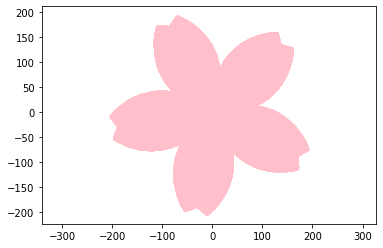

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import math
for j in range(5):
  for i in range(1,5):

    A=np.array([
            [math.cos(math.radians(72*i)), -math.sin(math.radians(72*i)), 0],
            [math.sin(math.radians(72*i)), math.cos(math.radians(72*i)), 0],
            [0, 0, 1]
  ])
    # データ行列の3行目に1が成分の行を追加する
    img1=np.insert(img, 2, 1, axis=0)

    imgnew=np.dot(A,img1)

    # 変換後のデータ行列の3行目を消去
    imgnew=np.delete(imgnew, 2, axis=0)
    imgnew
    # 元画像を灰色
    plt.scatter(img[0],img[1], s=1, color="pink")
    # 移動後の画像を黒色
    plt.scatter(imgnew[0], imgnew[1], s=1, color="pink")
    plt.axis('equal')
    plt.grid(which='major')
plt.show()

<h3> 花びらが舞っている様子を表現する




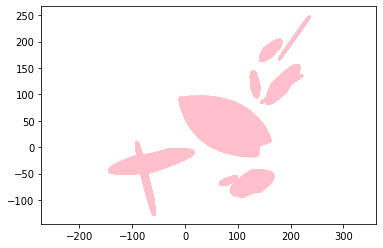

In [ ]:
import random
for i in range(10):
  A1=np.array([
              [math.cos(math.radians(random.randint(0,360))), -math.sin(math.radians(random.randint(0,360))), 0],
              [math.sin(math.radians(random.randint(0,180))), math.cos(math.radians(random.randint(0,180))), 0],
              [0, 0, 1]
  ])

  A2=np.array([
               [1/(random.randint(1,4)), 0, random.randint(-100,190)],
               [0, 1/(random.randint(1,4)), random.randint(-100,190)],
               [0, 0, 1]
   ])

  A=np.dot(A2,A1)

  img1=np.insert(img, 2, 1, axis=0)

  imgnew=np.dot(A,img1)

  imgnew=np.delete(imgnew, 2, axis=0)

  # plt.scatter(img[0],img[1], s=1, color="pink")
  # 移動後の画像を黒色
  plt.scatter(imgnew[0], imgnew[1], s=1, color="pink")
  plt.axis('equal')
  plt.grid(which='major')
plt.show()